<a href="https://colab.research.google.com/github/educardenas97/Vacunados/blob/Backend/Model_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://www.mspbs.gov.py/xweb/vacunados.csv  -P /tmp/ -o vacunados.csv --no-check-certificate

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gc
import os

#Limits of dataset
upper_limit = 2003
lower_limit = 1960


csv = pd.read_csv('./drive/MyDrive/Colab Notebooks/vacunados/vacunados.csv', sep=';')
csv_2 = pd.read_csv('./drive/MyDrive/Colab Notebooks/vacunados/padron.csv', sep=',')

In [ ]:
data = csv.copy()
data = data[data['cedula'].astype(str).str.isdigit()]
data['cedula'] = pd.to_numeric(data['cedula'])
data['dosis'] = data['dosis'].astype(int)
data['fecha_aplicacion'] = pd.to_datetime(data['fecha_aplicacion'])
data['fecha_aplicacion'] = data['fecha_aplicacion'].dt.strftime("%U").astype(int)

#Filter data
data = data[data['fecha_aplicacion']>4]
data = data[data['cedula']<90000000]
data = data[data['dosis']==1]

Text(0.5, 0, 'fecha')

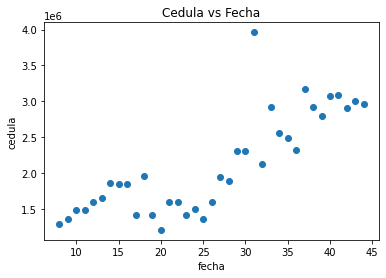

In [ ]:
#Primera parte
data.head()
data.describe()
mean = data.groupby('fecha_aplicacion').std()

fig, ax = plt.subplots()
ax.scatter(mean.index, mean['cedula'])
# set a title and labels
ax.set_title('Cedula vs Fecha')
ax.set_ylabel('cedula')
ax.set_xlabel('fecha')

In [ ]:
print(csv_2.shape)
csv.head()
padron = csv_2.copy()
join_dataframe = data.join(padron.set_index('id'), on='cedula', how='inner')
join_dataframe.head()


(774410, 3)


,nombre,apellido,establecimiento,fecha_aplicacion,cedula,dosis,descripcion_vacuna,actualizado_al,year,date
355,ENZO ANTONIO,ROMERO FERNANDEZ,HD Itá,39,4991012,1,PFIZER - COVID -19,2021-11-05 18:00:04,1995,26
396,CLARA ELENA,LEON LOPEZ,Sede social de la cooperativa Ñemby,39,751373,1,ASTRAZENECA-CHADOX1-S - COVID-19,2021-11-05 18:00:04,1960,61
640,SOFIA BEATRIZ,CUEVAS ROJAS,HD Itá,39,4574458,1,ASTRAZENECA-CHADOX1-S - COVID-19,2021-11-05 18:00:04,1983,38
1278,CESAR RAMON,ACOSTA ESQUIVEL,HD Itá,39,6555432,1,PFIZER - COVID -19,2021-11-05 18:00:04,2000,21
1662,DAVID,VELAZQUEZ IRALA,HR San Pedro,39,3488028,1,ASTRAZENECA-CHADOX1-S - COVID-19,2021-11-05 18:00:04,1983,38


In [ ]:
import plotly.express as px
fig = px.scatter_3d(join_dataframe.sample(n=250), x='cedula', y='fecha_aplicacion', z='date', color='descripcion_vacuna')
fig.show()